In [1]:
import warnings
warnings.filterwarnings('ignore')
from UNAGI import UNAGI
unagi = UNAGI()

In [14]:
file_path = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/tabula-muris-senis-droplet-processed-official-annotations-Lung.h5ad"
adata = sc.read_h5ad(file_path)

In [16]:
adata = adata[adata.obs['sex'] != 'female'].copy()

In [17]:
adata.obs['age'].unique()

['18m', '30m', '1m', '3m']
Categories (4, object): ['1m', '3m', '18m', '30m']

In [6]:
import scanpy as sc
import os

# Path to your full h5ad
adata_path = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/tabula-muris-senis-droplet-processed-official-annotations-Lung.h5ad"
out_dir = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split"   # any writable directory

# Load full dataset
adata = sc.read_h5ad(adata_path)
adata = adata[adata.obs['sex'] != 'female'].copy()

# Make sure age column is string/categorical
adata.obs["age"] = adata.obs["age"].astype(str)

# Define stage order (important for UNAGI: they become 0.h5ad, 1.h5ad, …)
stage_order = ["1m", "3m", "18m", "30m"]  # adjust if you have more

# Create output directory
os.makedirs(out_dir, exist_ok=True)

# Split and save
for i, stage in enumerate(stage_order):
    ad_sub = adata[adata.obs["age"] == stage].copy()
    out_path = os.path.join(out_dir, f"{i}.h5ad")
    ad_sub.write_h5ad(out_path)
    print(f"Saved {stage} → {out_path} with {ad_sub.n_obs} cells")



Saved 1m → /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split/0.h5ad with 2508 cells
Saved 3m → /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split/1.h5ad with 2249 cells
Saved 18m → /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split/2.h5ad with 2886 cells
Saved 30m → /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split/3.h5ad with 11093 cells


In [3]:
import scanpy as sc
import os

# Path to your full h5ad
adata_path = "/mnt/data/archive/ageing_bleo_data_2024/single_cell/filtered_machinelearning_labeled.h5ad"
out_dir = "/mnt/data/archive/ageing_bleo_data_2024/single_cell/unagi_age_test"  

# Load full dataset
adata = sc.read_h5ad(adata_path)
adata = adata[~adata.obs["age"].isin(["4months", "2year"])].copy()
adata.obs["age"]

adata.obs['condition'].unique()
adata.obs["name.simple"] = adata.obs["cell_type"].astype(str)

# adata.obs['age'].unique()

stage_order = ["control", "bleo"]  # adjust if you have more

# Create output directory
os.makedirs(out_dir, exist_ok=True)

# Split and save
for i, stage in enumerate(stage_order):
    ad_sub = adata[adata.obs["condition"] == stage].copy()
    out_path = os.path.join(out_dir, f"{i}.h5ad")
    ad_sub.write_h5ad(out_path)
    print(f"Saved {stage} → {out_path} with {ad_sub.n_obs} cells")
    
    
# unagi.setup_data('/mnt/data/archive/ageing_bleo_data_2024/single_cell/unagi',
#                  total_stage=2,stage_key='condition')

# import scanpy as sc
# import numpy as np
# import os
# import scipy.sparse as sp

# BASE_DIR = "/mnt/data/archive/ageing_bleo_data_2024/single_cell/unagi"

# for fname in sorted([f for f in os.listdir(BASE_DIR) if f.endswith(".h5ad")]):
#     path = os.path.join(BASE_DIR, fname)
#     ad = sc.read_h5ad(path)

#     # --- Clean main matrix (.X) ---
#     X = ad.X.toarray() if sp.issparse(ad.X) else ad.X
#     if np.any(np.isnan(X)) or np.any(np.isinf(X)):
#         print(f"[cleaning] NaNs in X for {fname}")
#         ad.X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

#     # --- Clean raw.X if exists ---
#     if ad.raw is not None:
#         Xraw = ad.raw.X
#         if sp.issparse(Xraw):
#             Xraw = Xraw.toarray()
#         if np.any(np.isnan(Xraw)) or np.any(np.isinf(Xraw)):
#             print(f"[cleaning] NaNs in raw.X for {fname}")
#             Xraw = np.nan_to_num(Xraw, nan=0.0, posinf=0.0, neginf=0.0)
#             ad.raw._X = Xraw

#     # --- Clean all layers (if any) ---
#     for layer in list(ad.layers.keys()):
#         Xlayer = ad.layers[layer]
#         if sp.issparse(Xlayer):
#             Xlayer = Xlayer.toarray()
#         if np.any(np.isnan(Xlayer)) or np.any(np.isinf(Xlayer)):
#             print(f"[cleaning] NaNs in layer '{layer}' for {fname}")
#             ad.layers[layer] = np.nan_to_num(Xlayer, nan=0.0, posinf=0.0, neginf=0.0)

#     ad.write_h5ad(path)
#     print(f"[ok] Cleaned {fname}")

# from UNAGI import UNAGI
# u = UNAGI()
# dir(u)

# import scanpy as sc, scipy.sparse as sp
# ad = sc.read_h5ad("/mnt/data/archive/ageing_bleo_data_2024/single_cell/unagi/0.h5ad")
# print(type(ad.X))

# import scanpy as sc
# for i in [0,1]:
#     ad = sc.read_h5ad(f"/mnt/data/archive/ageing_bleo_data_2024/single_cell/unagi/{i}.h5ad")
#     print(f"{i}.h5ad  →  X.shape={ad.X.shape}")
#     if "z" in ad.obsm:
#         print(f"        z.shape={ad.obsm['z'].shape}")
#     else:
#         print("        no latent z found")
# import numpy as np
# np.isnan(adata.X).sum(), np.isinf(adata.X).sum()


Saved control → /mnt/data/archive/ageing_bleo_data_2024/single_cell/unagi_age_test/0.h5ad with 2057 cells
Saved bleo → /mnt/data/archive/ageing_bleo_data_2024/single_cell/unagi_age_test/1.h5ad with 2729 cells


In [ ]:
# ============================================
# Load Lung.h5ad → filter males, drop 1m & 30m, rename columns
# ============================================

import scanpy as sc
import pandas as pd

# --- CONFIG ---
H5AD_PATH = "/mnt/data/melhajjar/tabula_muris/all_tissues/Lung.h5ad"

# --- 1. Load data ---
adata = sc.read_h5ad(H5AD_PATH)
print(f"✅ Loaded: {adata.shape[0]} cells × {adata.shape[1]} genes")

# --- 2. Inspect columns ---
print("\n.obs columns available:", adata.obs.columns.tolist())

# --- 3. Keep only male mice ---
if "sex" in adata.obs.columns:
    adata = adata[adata.obs["sex"] == "male"].copy()
    print(f"✅ Kept only male mice: {adata.shape[0]} cells")

# --- 4. Remove 1m and 30m ---
if "age" in adata.obs.columns:
    adata = adata[~adata.obs["age"].isin(["1m", "30m"])].copy()
    print(f"✅ Removed 1m & 30m: {adata.shape[0]} cells")

# --- 5. Rename columns for consistency ---
if "cell_ontology_class" in adata.obs.columns:
    adata.obs.rename(columns={"cell_ontology_class": "cell_type"}, inplace=True)
    print("✅ Renamed 'cell_ontology_class' → 'cell_type'")

if "age" in adata.obs.columns:
    adata.obs.rename(columns={"age": "condition"}, inplace=True)
    print("✅ Renamed 'age' → 'condition'")

# --- 6. Summary ---
print(f"\nFinal AnnData: {adata.shape[0]} cells × {adata.shape[1]} genes")
print("Unique conditions:", adata.obs["condition"].unique().tolist())
print("Unique sexes:", adata.obs["sex"].unique().tolist())
print("Unique cell types:", len(adata.obs['cell_type'].unique()))





# ============================================
# Save 3m cells into a new H5AD file
# ============================================

import os
import scanpy as sc

# --- CONFIG ---
OUTPUT_DIR = "/mnt/data/archive/ageing_bleo_data_2024/single_cell/unagi_age_test"
os.makedirs(OUTPUT_DIR, exist_ok=True)
OUTPUT_PATH = os.path.join(OUTPUT_DIR, "Lung_3m_only.h5ad")

# --- 1. Filter only 3m cells ---
adata_3m = adata[adata.obs["condition"] == "18m"].copy()
print(f"✅ Filtered 3m cells: {adata_3m.shape[0]} cells × {adata_3m.shape[1]} genes")

# --- 2. Save to H5AD ---
adata_3m.write(OUTPUT_PATH)
print(f"💾 Saved 3m dataset to:\n{OUTPUT_PATH}")


✅ Loaded: 24540 cells × 20138 genes

.obs columns available: ['age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation']
✅ Kept only male mice: 18736 cells
✅ Removed 1m & 30m: 5135 cells
✅ Renamed 'cell_ontology_class' → 'cell_type'
✅ Renamed 'age' → 'condition'

Final AnnData: 5135 cells × 20138 genes
Unique conditions: ['18m', '3m']
Unique sexes: ['male']
Unique cell types: 30


✅ Filtered 3m cells: 2886 cells × 20138 genes
💾 Saved 3m dataset to:
/mnt/data/archive/ageing_bleo_data_2024/single_cell/unagi_age_test/Lung_3m_only.h5ad


In [12]:
import os
import numpy as np
import pandas as pd
import scanpy as sc

# --- 0) Load your AnnData object ---
adata = sc.read_h5ad("/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/tabula-muris-senis-droplet-processed-official-annotations-Lung.h5ad")

# --- 1) Ensure normalized/logged data so rank_genes_groups won't complain ---
if not hasattr(adata, "raw") or adata.raw is None:
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.raw = adata.copy()   # store a logged reference

# --- 2) Provide UNAGI's expected per-cell label column: `name.simple` ---
if "cell_ontology_class" in adata.obs:
    adata.obs["name.simple"] = adata.obs["cell_ontology_class"].astype(str)
elif "celltype_fine" in adata.obs:
    adata.obs["name.simple"] = adata.obs["celltype_fine"].astype(str)
elif "celltype" in adata.obs:
    adata.obs["name.simple"] = adata.obs["celltype"].astype(str)
else:
    if "leiden" not in adata.obs:
        sc.pp.pca(adata, n_comps=50, svd_solver="arpack")
        sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
        sc.tl.leiden(adata, resolution=1.0)
    adata.obs["name.simple"] = adata.obs["leiden"].astype(str)

# --- 3) Clean labels ---
adata.obs["name.simple"] = (
    adata.obs["name.simple"]
    .str.replace(r"\s+", " ", regex=True)
    .str.replace("_", " ", regex=False)
    .str.strip()
)

# Optional: format labels
def _pretty_label(s: str) -> str:
    return " ".join([w if w.isupper() or any(ch.isdigit() for ch in w) else w.capitalize()
                     for w in s.split(" ")])

adata.obs["name.simple"] = adata.obs["name.simple"].map(_pretty_label)

# --- 4) Verify ---
print("name.simple examples:", adata.obs["name.simple"].value_counts().head(10))

# --- 5) Run UNAGI ---
idrem_dir = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split"
os.makedirs(idrem_dir, exist_ok=True)

unagi.run_UNAGI(idrem_dir=idrem_dir)

   

name.simple examples: name.simple
Classical Monocyte                 7922
Bronchial Smooth Muscle Cell       2339
Intermediate Monocyte              1749
Fibroblast Of Lung                 1523
B Cell                             1501
Alveolar Macrophage                1366
NK Cell                            1193
Lung Macrophage                    1157
Non-classical Monocyte             1010
CD8-positive, Alpha-beta T Cell     870
Name: count, dtype: int64


AttributeError: 'UNAGI' object has no attribute 'training_parameters'

In [14]:
# ---- Create >=2 stages, then run UNAGI (CPU) ----
import re
import numpy as np
import pandas as pd

def ensure_multistage(adata):
    # 1) If `age` exists, parse months and bin
    if "age" in adata.obs:
        # Normalize age values to strings
        ages = adata.obs["age"].astype(str).fillna("")
        # Extract integer months (e.g., "24m" -> 24)
        def parse_months(s):
            m = re.search(r"(\d+)\s*m", s.lower())
            if m: 
                return int(m.group(1))
            # Try plain integer
            try:
                return int(float(s))
            except Exception:
                return np.nan
        months = ages.map(parse_months)
        adata.obs["_age_months_tmp"] = months

        # Bin: <=6 -> young, 7-17 -> mid, >=18 -> old
        def age_bin(x):
            if pd.isna(x): return np.nan
            if x <= 6: return "stage1_young"
            if 7 <= x <= 17: return "stage2_mid"
            return "stage3_old"
        bins = months.map(age_bin)
        adata.obs["stage"] = pd.Categorical(bins)
        # Drop rows with NaN stage (if any age was unparsable)
        if adata.obs["stage"].isna().any():
            # Fill NaNs with the most common non-null stage if exists
            vc = adata.obs["stage"].value_counts()
            if len(vc) > 0:
                mode_stage = vc.index[0]
                adata.obs.loc[adata.obs["stage"].isna(), "stage"] = mode_stage
        # Remove empty categories
        adata.obs["stage"] = adata.obs["stage"].cat.remove_unused_categories()
        # If still only one stage, collapse to two bins as backup (<=12 vs >12)
        if adata.obs["stage"].nunique() < 2 and months.notna().any():
            adata.obs["stage"] = pd.Categorical(
                np.where(months <= 12, "stage1_<=12m", "stage2_>12m")
            )
        adata.obs.drop(columns=["_age_months_tmp"], errors="ignore", inplace=True)

    # 2) Else: try common timepoint-like columns
    if "stage" not in adata.obs or adata.obs["stage"].nunique() < 2:
        for cand in ("timepoint", "day", "days_post", "dpi", "condition", "group"):
            if cand in adata.obs and adata.obs[cand].nunique() >= 2:
                adata.obs["stage"] = pd.Categorical(adata.obs[cand].astype(str))
                break

    # 3) Else: split by sample/batch as a last resort
    if "stage" not in adata.obs or adata.obs["stage"].nunique() < 2:
        for cand in ("sample", "sample_id", "batch", "orig.ident"):
            if cand in adata.obs and adata.obs[cand].nunique() >= 2:
                # Use up to 3 groups to form stages
                levels = list(pd.unique(adata.obs[cand].astype(str)))
                # Map first N groups directly
                mapping = {lvl: f"stage{i+1}" for i, lvl in enumerate(levels[:3])}
                adata.obs["stage"] = pd.Categorical(adata.obs[cand].astype(str).map(mapping))
                break

    # Final check
    if "stage" not in adata.obs or adata.obs["stage"].nunique() < 2:
        raise ValueError(
            "Could not infer >=2 stages. Please provide a column with at least two groups "
            "(e.g., age/timepoint/condition) and set adata.obs['stage'] accordingly."
        )

# ---- Build stages ----
ensure_multistage(adata)
total_stage = int(adata.obs["stage"].nunique())
print("Stages and counts:\n", adata.obs["stage"].value_counts())

# ---- Write ready file for UNAGI ----
READY_H5AD = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/lung_ready_for_unagi.h5ad"
adata.write(READY_H5AD, compression="gzip")

# ---- UNAGI pipeline (CPU) ----
from UNAGI import UNAGI
unagi = UNAGI()

# Optional: species
try:
    unagi.register_species("human")
except Exception:
    pass

# Setup data (UNAGI will split by 'stage' internally if given a single h5ad)
unagi.setup_data(
    data_path=READY_H5AD,
    stage_key="stage",
    total_stage=total_stage,
    neighbors=25,
    threads=4
)

# CPU-only training
unagi.setup_training(
    task="lung_example_cpu",
    dist="ziln",
    device="cpu",
    GPU=False,
    epoch_initial=1,
    epoch_iter=5,
    max_iter=3,
    BATCHSIZE=256,
    lr=1e-4,
    lr_dis=5e-4,
)

# IMPORTANT: This must be your iDREM installation directory (not an output folder)
IDREM_DIR = "/bioinformatics/tools/idrem"   # <-- update to your actual iDREM path
try:
    unagi.run_UNAGI(IDREM_DIR)
except TypeError:
    unagi.run_UNAGI(idrem_dir=IDREM_DIR)



Stages and counts:
 stage
stage3_old      18420
stage1_young     6120
Name: count, dtype: int64
The dataset is not splited into stages, please use setup_data function to split the dataset into stages first


ValueError: The iteration 0 folder is already existed, please remove the folder and rerun the code

In [15]:
# ---- 1) Split your AnnData into per-stage files ----
import os
import scanpy as sc

UNAGI_DATA_DIR = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_stages"
os.makedirs(UNAGI_DATA_DIR, exist_ok=True)

# Ensure 'stage' is categorical and has >=2 levels (you already printed young/old)
adata.obs["stage"] = adata.obs["stage"].astype("category")

stage_files = []
for stg in adata.obs["stage"].cat.categories:
    adata_stg = adata[adata.obs["stage"] == stg].copy()
    out_path = os.path.join(UNAGI_DATA_DIR, f"{stg}.h5ad")
    adata_stg.write(out_path, compression="gzip")
    stage_files.append(out_path)
    print(f"Saved {stg}: {adata_stg.n_obs} cells -> {out_path}")

print("Stage files:", stage_files)

# ---- 2) UNAGI: init, setup_data from the directory, setup_training, run (CPU) ----
from UNAGI import UNAGI

unagi = UNAGI()

# Optional: species
try:
    unagi.register_species("human")
except Exception:
    pass

# Tell UNAGI to use the directory of per-stage files
total_stage = len(adata.obs["stage"].cat.categories)
unagi.setup_data(
    data_path=UNAGI_DATA_DIR,   # <--- directory with per-stage .h5ad files
    stage_key="stage",          # harmless even with directory input
    total_stage=total_stage,
    neighbors=25,
    threads=4
)

# Configure CPU-only training
unagi.setup_training(
    task="lung_example_cpu",
    dist="ziln",
    device="cpu",
    GPU=False,
    epoch_initial=1,
    epoch_iter=5,
    max_iter=3,
    BATCHSIZE=256,
    lr=1e-4,
    lr_dis=5e-4,
)

# IMPORTANT: set this to your actual iDREM installation directory
IDREM_DIR = "/bioinformatics/tools/idrem"   # <-- update this path if different

# Run UNAGI (some versions take positional, others keyword)
try:
    unagi.run_UNAGI(IDREM_DIR)
except TypeError:
    unagi.run_UNAGI(idrem_dir=IDREM_DIR)


Saved stage1_young: 6120 cells -> /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_stages/stage1_young.h5ad
Saved stage3_old: 18420 cells -> /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_stages/stage3_old.h5ad
Stage files: ['/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_stages/stage1_young.h5ad', '/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_stages/stage3_old.h5ad']
The dataset is not splited into stages, please use setup_data function to split the dataset into stages first


IsADirectoryError: [Errno 21] Unable to synchronously open file (file read failed: time = Thu Sep 18 03:21:20 2025
, filename = '/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_stages', file descriptor = 49, errno = 21, error message = 'Is a directory', buf = 0x7ffe8481b768, total read size = 8, bytes this sub-read = 8, bytes actually read = 18446744073709551615, offset = 0)

In [ ]:
# ==== 1) Split by age into numbered stage files (male-only) ====
import os
import scanpy as sc

adata_path = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/tabula-muris-senis-droplet-processed-official-annotations-Lung.h5ad"
out_dir    = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split"  # directory UNAGI will read

# Load full dataset
adata = sc.read_h5ad(adata_path)

# Keep only male (you wrote: exclude females)
adata = adata[adata.obs["sex"] != "female"].copy()

# Ensure strings
adata.obs["age"] = adata.obs["age"].astype(str)

# Define desired stage order (adjust if you have others)
stage_order = ["1m", "3m", "18m", "30m"]

os.makedirs(out_dir, exist_ok=True)

written = []
for i, stage in enumerate(stage_order):
    ad_sub = adata[adata.obs["age"] == stage].copy()
    if ad_sub.n_obs == 0:
        print(f"[skip] No cells for {stage}")
        continue
    out_path = os.path.join(out_dir, f"{i}.h5ad")
    ad_sub.write_h5ad(out_path)
    written.append(out_path)
    print(f"[ok] Saved {stage} → {out_path} ({ad_sub.n_obs} cells)")

if len(written) < 2:
    raise ValueError("Need ≥2 stages for UNAGI. Add more ages to stage_order or check adata.obs['age'].")

# ==== 2) UNAGI: train on CPU ====
from UNAGI import UNAGI

unagi = UNAGI()
try:
    unagi.register_species("human")
except Exception:
    pass

total_stage = len(written)

def setup_and_train_with_dir():
    # Some UNAGI versions accept a directory of numbered .h5ad files directly
    unagi.setup_data(
        data_path=out_dir,      # directory with 0.h5ad, 1.h5ad, ...
        stage_key="age",        # harmless here; directory mode may ignore it
        total_stage=total_stage,
        neighbors=25,
        threads=4,
    )
    unagi.setup_training(
        task="lung_example_cpu",
        dist="ziln",
        device="cpu",
        GPU=False,
        epoch_initial=1,
        epoch_iter=5,
        max_iter=3,
        BATCHSIZE=256,
        lr=1e-4,
        lr_dis=5e-4,
    )

IDREM_DIR = "/bioinformatics/tools/idrem"  # <-- set to your actual iDREM install dir

# Try directory mode first; if your UNAGI expects a single file, fallback below.
try:
    setup_and_train_with_dir()
    try:
        unagi.run_UNAGI(IDREM_DIR)
    except TypeError:
        unagi.run_UNAGI(idrem_dir=IDREM_DIR)
except Exception as e:
    print(f"[info] Directory mode failed ({type(e).__name__}: {e}). Falling back to single-file mode…")

    # ==== 2b) Fallback: build one combined file with a 'stage' column ====
    # Re-load original (male-only) and attach a categorical 'stage' based on stage_order index
    ad = sc.read_h5ad(adata_path)
    ad = ad[ad.obs["sex"] != "female"].copy()
    ad.obs["age"] = ad.obs["age"].astype(str)

    # Map each age → its index in stage_order; drop cells whose age not in stage_order
    idx_map = {age:i for i, age in enumerate(stage_order)}
    mask = ad.obs["age"].isin(idx_map.keys())
    ad = ad[mask].copy()
    ad.obs["stage"] = ad.obs["age"].map(lambda a: f"stage{idx_map[a]}")

    ready_file = os.path.join(out_dir, "combined_with_stage.h5ad")
    ad.write_h5ad(ready_file)
    print(f"[ok] Wrote combined file with 'stage': {ready_file} ({ad.n_obs} cells)")

    # Now standard UNAGI single-file flow
    unagi = UNAGI()
    try:
        unagi.register_species("human")
    except Exception:
        pass

    unagi.setup_data(
        data_path=ready_file,   # single file; UNAGI will split by 'stage'
        stage_key="stage",
        total_stage=ad.obs["stage"].nunique(),
        neighbors=25,
        threads=4,
    )
    unagi.setup_training(
        task="lung_example_cpu",
        dist="ziln",
        device="cpu",
        GPU=False,
        epoch_initial=1,
        epoch_iter=5,
        max_iter=3,
        BATCHSIZE=256,
        lr=1e-4,
        lr_dis=5e-4,
    )
    try:
        unagi.run_UNAGI(IDREM_DIR)
    except TypeError:
        unagi.run_UNAGI(idrem_dir=IDREM_DIR)



stage
stage3_old      18420
stage1_young     6120
Name: count, dtype: int64
The dataset is not splited into stages, please use setup_data function to split the dataset into stages first


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


[ok] Saved 1m → /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split/0.h5ad (2508 cells)
[ok] Saved 3m → /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split/1.h5ad (2249 cells)
[ok] Saved 18m → /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split/2.h5ad (2886 cells)
[ok] Saved 30m → /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split/3.h5ad (11093 cells)
Cell graphs not found, calculating cell graphs for individual stages! Using K=25 and threads=4 for cell graph construction
Calculating cell graph for stage 0.....
Calculating cell graph for stage 1.....
Calculating cell graph for stage 2.....
Calculating cell graph for stage 3.....
Species: Running on Human data
...
0
vae_loss 11246.47912927576
dis_loss 0.0493497400642121
adversarial_loss 6.684103996367068
[epoch 000]  average training loss: 11246.4791
CPO parameters are not set up, using default parameters
anchor_neighbors: 15, max_neighbors: 35,

/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

top gene


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:


done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

top gene


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:


done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

top gene
done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

IDREM parameters are not set up, using default parameters
Minimum_Absolute_Log_Ratio_Expression: 0.5, Convergence_Likelihood: 0.001, Minimum_Standard_Deviation: 0.5
b''
[[[12], [0, 3, 6, 8, 9], [1, 7, 10, 17], [8]], [[2], [1, 11], [3, 4, 5, 9, 18], [1, 3, 9, 10, 12, 15]], [[13], [2, 4, 5, 10], [11], [16]], [[3], [13], [2, 8, 13], [14]]]
['12', '0n3n6n8n9', '1n7n10n17', '8']
[info] Directory mode failed (FileNotFoundError: [Errno 2] No such file or directory: '/bioinformatics/tools/idrem/example_settings.txt'). Falling back to single-file mode…


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


[ok] Wrote combined file with 'stage': /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split/combined_with_stage.h5ad (18736 cells)


ValueError: The iteration 0 folder is already existed, please remove the folder and rerun the code

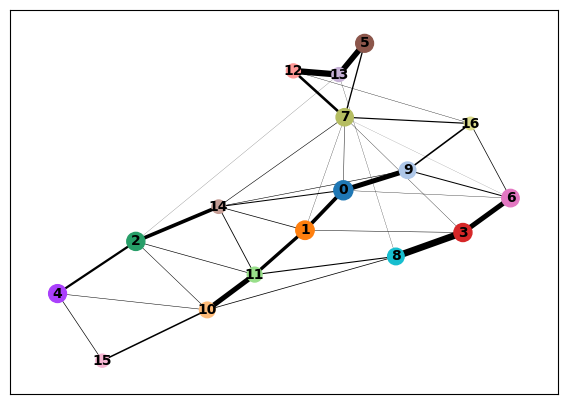

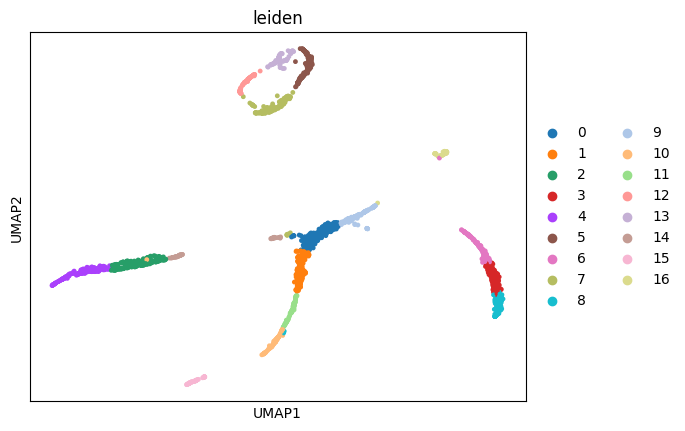

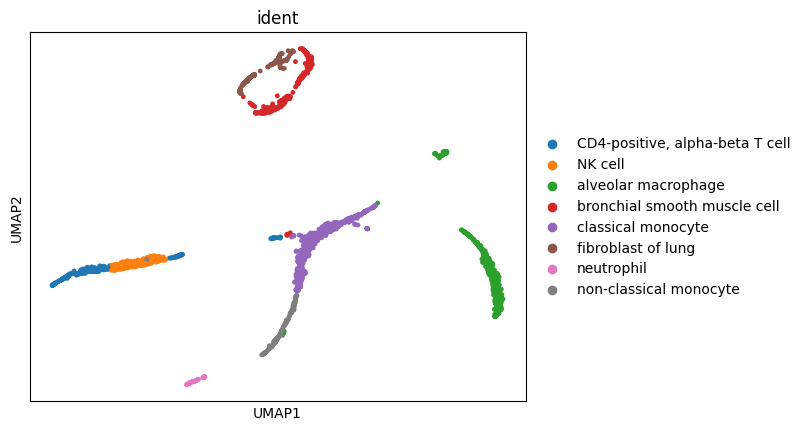

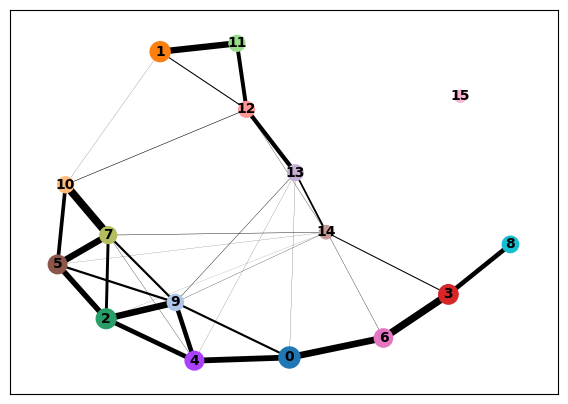

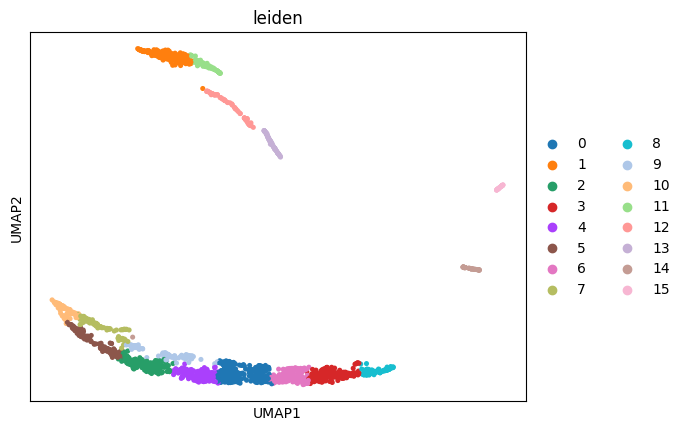

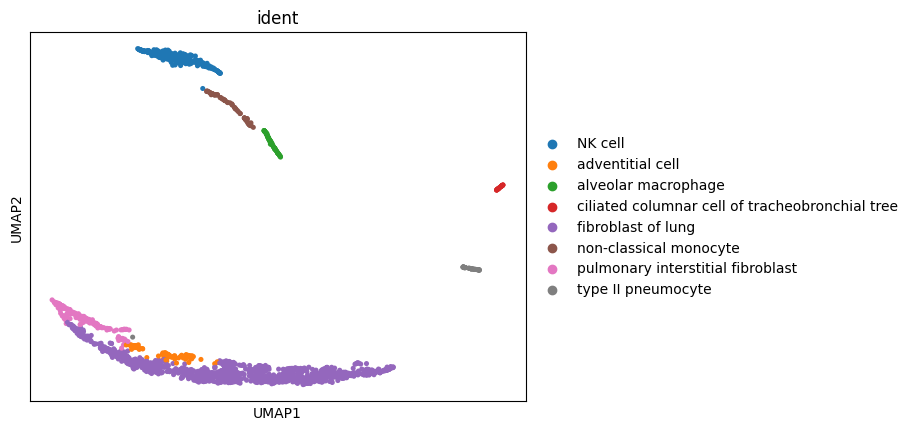

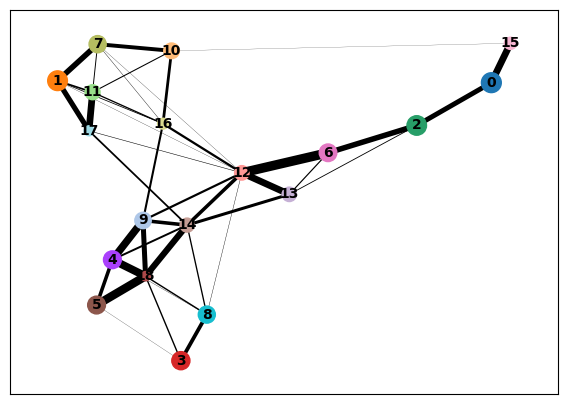

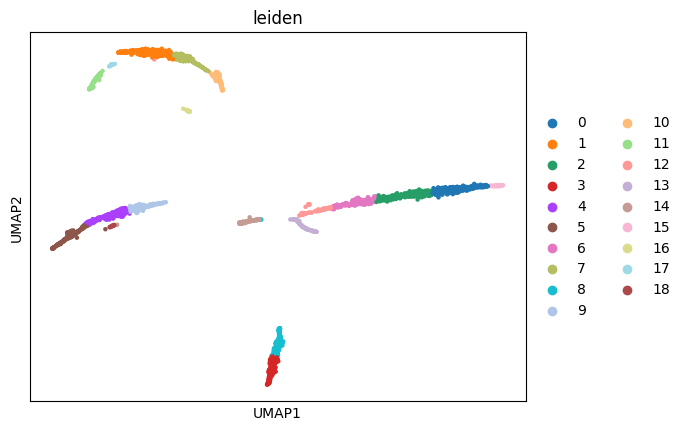

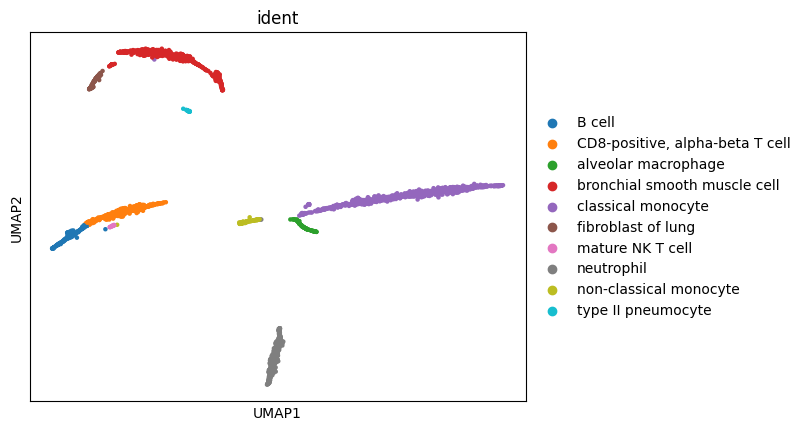

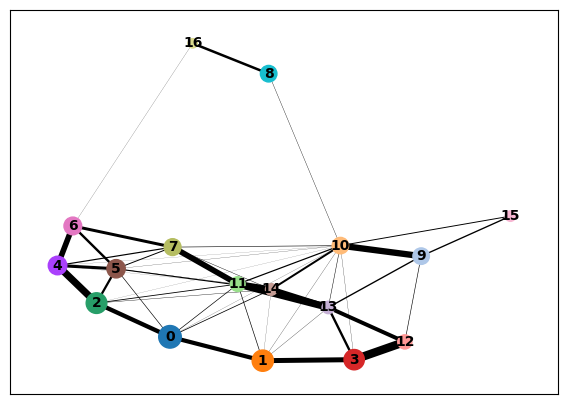

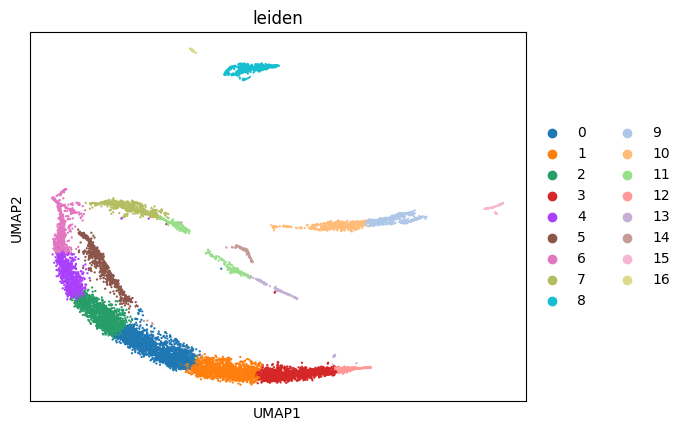

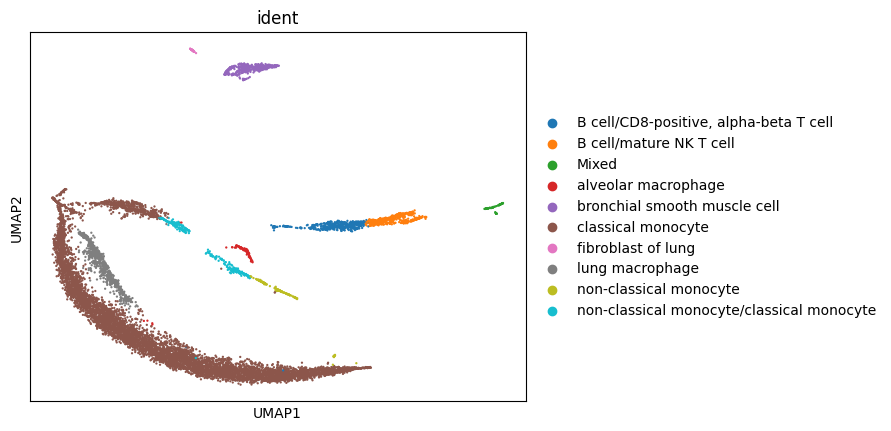

In [6]:
# ==== 1) Split by age into numbered stage files (male-only) ====
import os
import scanpy as sc

adata_path = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/tabula-muris-senis-droplet-processed-official-annotations-Lung.h5ad"
out_dir    = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_lung_split"  # directory UNAGI will read

# Load full dataset
adata = sc.read_h5ad(adata_path)

# Keep only male (you wrote: exclude females)
adata = adata[adata.obs["sex"] != "female"].copy()

# Ensure strings
adata.obs["age"] = adata.obs["age"].astype(str)

adata.obs["name.simple"] = adata.obs["cell_ontology_class"]
# Define desired stage order (adjust if you have others)
stage_order = ["1m", "3m", "18m", "30m"]

os.makedirs(out_dir, exist_ok=True)

written = []
for i, stage in enumerate(stage_order):
    ad_sub = adata[adata.obs["age"] == stage].copy()
    if ad_sub.n_obs == 0:
        print(f"[skip] No cells for {stage}")
        continue
    out_path = os.path.join(out_dir, f"{i}.h5ad")
    ad_sub.write_h5ad(out_path)
    written.append(out_path)
    print(f"[ok] Saved {stage} → {out_path} ({ad_sub.n_obs} cells)")

if len(written) < 2:
    raise ValueError("Need ≥2 stages for UNAGI. Add more ages to stage_order or check adata.obs['age'].")

# ==== 2) UNAGI: train on CPU ====
from UNAGI import UNAGI

unagi = UNAGI()
try:
    unagi.register_species("human")
except Exception:
    pass

total_stage = len(written)

def setup_and_train_with_dir():
    # Some UNAGI versions accept a directory of numbered .h5ad files directly
    unagi.setup_data(
        data_path=out_dir,      # directory with 0.h5ad, 1.h5ad, ...
        stage_key="age",        # harmless here; directory mode may ignore it
        total_stage=total_stage,
        neighbors=25,
        threads=4,
    )
    unagi.setup_training(
        task="lung_example_cpu",
        dist="ziln",
        device="cpu",
        GPU=False,
        epoch_initial=1,
        epoch_iter=5,
        max_iter=3,
        BATCHSIZE=256,
        lr=1e-4,
        lr_dis=5e-4,
    )

IDREM_DIR = "/bioinformatics/tools/idrem"  # <-- set to your actual iDREM install dir

# Try directory mode first; if your UNAGI expects a single file, fallback below.
try:
    setup_and_train_with_dir()
    try:
        unagi.run_UNAGI(IDREM_DIR)
    except TypeError:
        unagi.run_UNAGI(idrem_dir=IDREM_DIR)
except Exception as e:
    print(f"[info] Directory mode failed ({type(e).__name__}: {e}). Falling back to single-file mode…")

    # ==== 2b) Fallback: build one combined file with a 'stage' column ====
    # Re-load original (male-only) and attach a categorical 'stage' based on stage_order index
    ad = sc.read_h5ad(adata_path)
    ad = ad[ad.obs["sex"] != "female"].copy()
    ad.obs["age"] = ad.obs["age"].astype(str)

    # Map each age → its index in stage_order; drop cells whose age not in stage_order
    idx_map = {age:i for i, age in enumerate(stage_order)}
    mask = ad.obs["age"].isin(idx_map.keys())
    ad = ad[mask].copy()
    ad.obs["stage"] = ad.obs["age"].map(lambda a: f"stage{idx_map[a]}")

    ready_file = os.path.join(out_dir, "combined_with_stage.h5ad")
    ad.write_h5ad(ready_file)
    print(f"[ok] Wrote combined file with 'stage': {ready_file} ({ad.n_obs} cells)")

    # Now standard UNAGI single-file flow
    unagi = UNAGI()
    try:
        unagi.register_species("mouse")
    except Exception:
        pass

    unagi.setup_data(
        data_path=ready_file,   # single file; UNAGI will split by 'stage'
        stage_key="stage",
        total_stage=ad.obs["stage"].nunique(),
        neighbors=25,
        threads=4,
    )
    unagi.setup_training(
        task="lung_example_cpu",
        dist="ziln",
        device="cpu",
        GPU=False,
        epoch_initial=1,
        epoch_iter=5,
        max_iter=3,
        BATCHSIZE=256,
        lr=1e-4,
        lr_dis=5e-4,
    )
    try:
        unagi.run_UNAGI(IDREM_DIR)
    except TypeError:
        unagi.run_UNAGI(idrem_dir=IDREM_DIR)


In [ ]:
# ==== UNAGI (mouse, CPU) with numbered per-stage files ====
import os, shutil, datetime as dt
import scanpy as sc
from UNAGI import UNAGI

# ---------- Paths ----------
BASE_DIR  = "/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad"
H5AD_PATH = os.path.join(BASE_DIR, "tabula-muris-senis-droplet-processed-official-annotations-Lung.h5ad")
IDREM_DIR = "/home/melhajjar/idrem"   # you confirmed this contains example_settings.txt and idrem.jar

RUN_DIR = os.path.join(BASE_DIR, f"unagi_run_mouse_num_{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}")
os.makedirs(RUN_DIR, exist_ok=True)
print("Run dir:", RUN_DIR)

# ---------- Load & filter ----------
adata = sc.read_h5ad(H5AD_PATH)
print(adata)

# Optional: keep male only (set to False if you want all)
FILTER_MALE_ONLY = True
if FILTER_MALE_ONLY and "sex" in adata.obs:
    before = adata.n_obs
    adata = adata[adata.obs["sex"].astype(str).str.lower() != "female"].copy()
    print(f"Male-only: {before} -> {adata.n_obs} cells")

# Require 'age'
if "age" not in adata.obs:
    raise ValueError("Expected adata.obs['age'] (e.g., 1m/3m/18m/30m).")
adata.obs["age"] = adata.obs["age"].astype(str)

# Desired order; only keep those that exist
stage_order = ["1m", "3m", "18m", "30m"]
present = [a for a in stage_order if (adata.obs["age"] == a).any()]
if len(present) < 2:
    raise ValueError(f"Need ≥2 stages; found only {present}. Check adata.obs['age'].")

# ---------- Ensure UNAGI label per cell ----------
if "name.simple" not in adata.obs:
    if "cell_ontology_class" in adata.obs:
        adata.obs["name.simple"] = adata.obs["cell_ontology_class"].astype(str)
    else:
        # very last resort — cluster to produce a stable label
        if "leiden" not in adata.obs:
            sc.pp.normalize_total(adata, target_sum=1e4)
            sc.pp.log1p(adata)
            sc.pp.pca(adata, n_comps=50, svd_solver="arpack")
            sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
            sc.tl.leiden(adata, resolution=1.0)
        adata.obs["name.simple"] = adata.obs["leiden"].astype(str)

# ---------- Write numbered per-stage files 0.h5ad, 1.h5ad, ... ----------
# Clean any accidental leftovers
for f in os.listdir(RUN_DIR):
    if f.endswith(".h5ad") or f in ("0","1","2","stagedata","model_save","idremsetting"):
        p = os.path.join(RUN_DIR, f)
        try:
            shutil.rmtree(p)
        except NotADirectoryError:
            os.remove(p)

written = []
for i, age in enumerate(present):
    sub = adata[adata.obs["age"] == age].copy()
    out_path = os.path.join(RUN_DIR, f"{i}.h5ad")
    sub.write_h5ad(out_path)
    written.append(out_path)
    print(f"[ok] Wrote stage {i} ({age}) -> {out_path}  n={sub.n_obs}")

total_stage = len(written)
print("Total stages written:", total_stage)

# ---------- Sanity: iDREM present ----------
assert os.path.exists(os.path.join(IDREM_DIR, "example_settings.txt")), "Missing example_settings.txt in IDREM_DIR"
assert os.path.exists(os.path.join(IDREM_DIR, "idrem.jar")), "Missing idrem.jar in IDREM_DIR"

# ---------- UNAGI setup (directory mode) ----------
unagi = UNAGI()
try:
    unagi.register_species("mouse")
except Exception:
    pass

unagi.setup_data(
    data_path=RUN_DIR,     # <--- directory that contains 0.h5ad, 1.h5ad, ...
    stage_key="age",       # ignored in directory mode but harmless
    total_stage=total_stage,
    neighbors=25,
    threads=4,
)

unagi.setup_training(
    task="lung_example_cpu",
    dist="ziln",
    device="cpu",
    GPU=False,
    epoch_initial=1,
    epoch_iter=5,
    max_iter=3,
    BATCHSIZE=256,
    lr=1e-4,
    lr_dis=5e-4,
)

# ---------- Run ----------
try:
    unagi.run_UNAGI(IDREM_DIR)
except TypeError:
    unagi.run_UNAGI(idrem_dir=IDREM_DIR)

print("✅ UNAGI launched. Working dir:", RUN_DIR)



/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Run dir: /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_run_mouse_num_20250922_181858


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 24540 × 20138
    obs: 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'n_genes', 'sex', 'subtissue', 'tissue', 'tissue_free_annotation', 'n_counts', 'louvain', 'leiden'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'age_colors', 'cell_ontology_class_colors', 'leiden', 'louvain', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
Male-only: 24540 -> 18736 cells
[ok] Wrote stage 0 (1m) -> /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_run_mouse_num_20250922_181858/0.h5ad  n=2508
[ok] Wrote stage 1 (3m) -> /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_run_mouse_num_20250922_181858/1.h5ad  n=2249
[ok] Wrote stage 2 (18m) -> /mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_run_mouse_num_20250922_181858/2.h5ad  n=2886
[ok] Wrote stage 3 (30m) -> /mnt

/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/CPO_utils.py:117: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(anchor_adata, resolution = min_res)


top gene
done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

top gene


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:


done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

top gene


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:


done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

top gene
done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

IDREM parameters are not set up, using default parameters
Minimum_Absolute_Log_Ratio_Expression: 0.5, Convergence_Likelihood: 0.001, Minimum_Standard_Deviation: 0.5
b''
[[[12], [0, 3, 6, 8, 9], [1, 7, 10, 17], [8]], [[2], [1, 11], [3, 4, 5, 9, 18], [1, 3, 9, 10, 12, 15]], [[13], [2, 4, 5, 10], [11], [16]], [[3], [13], [2, 8, 13], [14]]]
['12', '0n3n6n8n9', '1n7n10n17', '8']
['2', '1n11', '3n4n5n9n18', '1n3n9n10n12n15']
['13', '2n4n5n10', '11', '16']
['3', '13', '2n8n13', '14']
['13-2n4n5n10-11-16.txt', '3-13-2n8n13-14.txt', '12-0n3n6n8n9-1n7n10n17-8.txt', '2-1n11-3n4n5n9n18-1n3n9n10n12n15.txt']
b'0\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n11\n12\n13\n14\n15\n16\n17\n18\n19\n20\nwriting Json..\nTime: 358802ms\n'
b'0\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n11\n12\n13\n14\n15\n16\n17\n18\n19\n20\n21\nwriting Json..\nTime: 416827ms\n'
b'0\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n11\n12\n13\n14\n15\n16\n17\n18\n19\n20\n21\n22\nwriting Json..\nTime: 319811ms\n'
b'0\n1\n2\n3\n4\n5\n6\n7\n8\n9\n10\n11\n12\n13\n14\n15\n

rm: cannot remove '/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_run_mouse_num_20250922_181858/0/idremResults': No such file or directory


IDREM results for 3-13-2n8n13-14.txt_viz are checked
checking IDREM results for  12-0n3n6n8n9-1n7n10n17-8.txt_viz
getting Target genes from  12-0n3n6n8n9-1n7n10n17-8.txt_viz
IDREM results for 12-0n3n6n8n9-1n7n10n17-8.txt_viz are checked
checking IDREM results for  2-1n11-3n4n5n9n18-1n3n9n10n12n15.txt_viz
getting Target genes from  2-1n11-3n4n5n9n18-1n3n9n10n12n15.txt_viz
IDREM results for 2-1n11-3n4n5n9n18-1n3n9n10n12n15.txt_viz are checked
idrem Done
getting TFs from  2-1n11-3n4n5n9n18-1n3n9n10n12n15.txt_viz
getting TFs from  12-0n3n6n8n9-1n7n10n17-8.txt_viz
getting TFs from  13-2n4n5n10-11-16.txt_viz
getting TFs from  3-13-2n8n13-14.txt_viz
getting Target genes from  2-1n11-3n4n5n9n18-1n3n9n10n12n15.txt_viz
getting Target genes from  12-0n3n6n8n9-1n7n10n17-8.txt_viz
getting Target genes from  13-2n4n5n10-11-16.txt_viz
getting Target genes from  3-13-2n8n13-14.txt_viz
Species: Running on Mouse data
...
load last iteration model.....
0
vae_loss 7192.800699287308
dis_loss 0.048224883084

/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

top gene


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:


done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

top gene


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.o

done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

top gene
done


/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:205: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if int(data.obs['leiden'][i]) == ID:
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/UNAGI/utils/attribute_utils.py:181: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

IDREM parameters are not set up, using default parameters
Minimum_Absolute_Log_Ratio_Expression: 0.5, Convergence_Likelihood: 0.001, Minimum_Standard_Deviation: 0.5
b''
[[[15], [0, 1, 2, 4], [11], [14]], [[10], [7], [1, 3, 12], [3, 6, 13, 17]], [[13], [10, 15], [0, 4, 8, 15], [1, 4, 5, 8, 10, 16]], [[3], [11], [13], [7, 15]], [[6], [13], [7, 9, 16], [19]], [[1], [16], [2, 5, 10], [9, 18]]]
['15', '0n1n2n4', '11', '14']
['10', '7', '1n3n12', '3n6n13n17']
['13', '10n15', '0n4n8n15', '1n4n5n8n10n16']
['3', '11', '13', '7n15']
['6', '13', '7n9n16', '19']
['1', '16', '2n5n10', '9n18']
['13-10n15-0n4n8n15-1n4n5n8n10n16.txt', '3-11-13-7n15.txt', '1-16-2n5n10-9n18.txt', '15-0n1n2n4-11-14.txt', '10-7-1n3n12-3n6n13n17.txt', '6-13-7n9n16-19.txt']


In [ ]:
### VISUALIZATION ###

In [20]:
import pickle
import scanpy as sc
from UNAGI import plotting
# adata = sc.read_h5ad('/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/tabula-muris-senis-droplet-processed-official-annotations-Lung.h5ad')
adata = sc.read_h5ad("/mnt/data/melhajjar/tabula_muris/all_tissues/droplet_h5ad/unagi_run_mouse_num_20250922_212021/2/stagedata/dataset.h5ad")
# adata = adata[adata.obs['sex'] != 'female'].copy()
# adata = adata[adata.obs['age'] != '1m'].copy()
# adata.obs["name.simple"] = adata.obs["cell_ontology_class"].astype(str)


In [21]:
import pickle
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

def cell_type_composition(adata, cell_type_key, stage_key,ax=None,dpi=300,show_cutoff = 0.04, colormaps='Spectral',category_colors=None, save=None):
    '''
    Plot the cell type composition of each stage

    Parameters
    ----------
    adata : AnnData object
        Annotated data matrix.
    cell_type_key : str
        Key for cell type column in adata.obs.
    stage_key : str
        Key for stage column in adata.obs.
    ax : matplotlib axis, optional
        The default is None.
    dpi : int, optional
        The default is 300.
    show_cutoff : float, optional
        The default is 0.04.
    colormaps : str, optional
        The default is 'Spectral'.
    category_colors : list, optional
        The default is None.
    save : str, optional
        Path to save the figure. The default is None.
    '''

    all_types = adata.obs[cell_type_key].unique().tolist()
    all_types = sorted(all_types)
    stage_keys = adata.obs[stage_key].unique().tolist()
    stage_keys = sorted(stage_keys)
    stage_keys = stage_keys[::-1]
    stage_types = {key :[] for key in stage_keys}
    total_stage = len(stage_keys)
    for i in stage_keys:
        stage_adata = adata[adata.obs[stage_key] == i]
        stage_cells = len(stage_adata)
        for each in all_types:
            stage_types[i].append(len(stage_adata[stage_adata.obs[cell_type_key] == each])/stage_cells)
    multiplier = 0
    width = 0.3
    if ax is None:
        fig,ax = plt.subplots(figsize=(15, 3),dpi=dpi)

    #transform the type of list to array
    # y_pos = [0, 1]
    for i in stage_types.keys():
        stage_types[i] = np.array(stage_types[i])
    bottom = 0
    data = np.array(list(stage_types.values()))
    data_cum = data.cumsum(axis=1)
    if category_colors is None:
        category_colors = [
    "#4dbbd5",  # Blue
    "#f39b7f",  # Orange
    "#00a087",  # Green
    "#e64b35",  # Red
    "#3c5488",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Yellow-Green
    "#17becf",  # Cyan
    "#ff9896",  # Light Red
    "#c5b0d5",  # Light Purple
    "#c49c94",  # Light Brown
    "#f7b6d2",  # Light Pink
    "#c7c7c7",  # Light Gray
    "#dbdb8d",   # Light Yellow-Green
    'tab:pink','tab:olive','tab:cyan','gold', 'springgreen','coral','skyblue','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','yellow','aqua', 'turquoise','orangered', 'lightblue','darkorchid', 'fuchsia','royalblue','slategray', 'silver', 'teal', 'fuchsia','grey','indigo','khaki','magenta','tab:gray'
]
    for j, (types,c) in enumerate(zip(all_types,category_colors)):
        widths = data[:,j]
        starts = data_cum[:, j] - widths 
        bc = ax.barh(list(stage_types.keys()), widths, left = starts, label=types,color=c,height=0.8)
        labels = ["" if v > show_cutoff else "" for v in widths]  
        ax.bar_label(bc, labels=labels,label_type='center',fmt='%.2f',fontsize=9,color='black')
    ax.legend(ncol=len(all_types)//2+1, bbox_to_anchor=(0.1, 1.3),
                loc='upper left', fontsize='x-small')
    # threshold = 0.15
    for c in ax.containers:#comments out to disable percentage on the plot
        #v format %.2f
        labels = [f'%.2f%%'%(v*100) if v > show_cutoff else "" for v in c.datavalues] #comments out to disable percentage on the plot
        # labels = [v if v > 0.05 else "" for v in c.datavalues]  
        ax.bar_label(c, labels=labels, label_type="center",fmt='%.2f')#comments out to disable percentage on the plot
        # ax.bar_label(bc, labels=weight_count,label_type='center',fontsize=9)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.grid(False) 
    if save is not None:
        plt.savefig(save)
    else:
        plt.show()

In [22]:
cell_type_composition(
    adata,
    cell_type_key="cell_ontology_class",
    stage_key="age",
    dpi=600,
    save="/mnt/data/melhajjar/tabula_muris/all_tissues/unagi_visulizations_workingcopy/cell_type_composition.pdf"
)



In [30]:

# colodict = {}
# for each in zip(all_types,category_colors):
#     colodict[each[0]] = rgb2hex(each[1])
import scanpy as sc
import gc

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import adjusted_rand_score,normalized_mutual_info_score
from sklearn.neighbors import kneighbors_graph

def plot_with_colormap(values,color_dict):
    '''
    The color scheme the cell types are plotted with.
    
    Parameters
    ----------
    values : list
        List of cell types.
    color_dict : dict
        Dictionary of cell types and their colors.
    
    Returns
    -------
    color_dict : dict
        Dictionary of cell types and their colors.
    '''
    color_list = ["#4dbbd5",  # Blue
                    "#f39b7f",  # Orange
                    "#00a087",  # Green
                    "#e64b35",  # Red
                    "#3c5488",  # Purple
                    "#8c564b",  # Brown
                    "#e377c2",  # Pink
                    "#7f7f7f",  # Gray
                    "#bcbd22",  # Yellow-Green
                    "#17becf",  # Cyan
                    "#ff9896",  # Light Red
                    "#c5b0d5",  # Light Purple
                    "#c49c94",  # Light Brown
                    "#f7b6d2",  # Light Pink
                    "#c7c7c7",  # Light Gray
                    "#dbdb8d"  , # Light Yellow-Green,
                    'tab:pink','tab:olive','tab:cyan','gold', 'springgreen','coral','skyblue','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','yellow','aqua', 'turquoise','orangered', 'lightblue','darkorchid', 'fuchsia','royalblue','slategray', 'silver', 'teal', 'fuchsia','grey','indigo','khaki','magenta','tab:gray']
    # random.shuffle(color_list)
    values = list(set(values))
    values = sorted(values)
    for i, value in enumerate(values):
        if value not in list(color_dict.keys()):
            color_dict[value] = color_list[(len(list(color_dict.keys()))+1)]
    return color_dict
def plot_stages_latent_representation(adatas, cell_type_key, stage_key,color_scheme=None,ax=None,dpi=300,save=None):
    '''
    Plot the latent representation of the cells colored by cell type and leiden clusters.

    Parameters
    ----------
    adatas : AnnData object
        Annotated data matrix.
    cell_type_key : str
        Key for cell type column in adata.obs.
    stage_key : str
        Key for stage column in adata.obs.
    color_scheme : dict, optional
        Dictionary of cell types and their colors. The default is None.
    ax : matplotlib axis, optional  
        The default is None.
    dpi : int, optional
        The default is 300.
    save : str, optional
        Path to save the figure. The default is None.

    Returns
    --------------

    '''
    sc.set_figure_params(scanpy=True, dpi=dpi)
    consistency = []
    ariss= []
    NMIs = []
    silhouettes = []
    # ITERATION= 5
    stage_keys = adatas.obs[stage_key].unique().tolist()
    stage_keys = sorted(stage_keys)
    stage_keys = stage_keys[::-1]

    if color_scheme is None:
        color_dict_unagi = {}
    else:
        color_dict_unagi = color_scheme

    color_dict_leiden = {}
    color_dict_groundtruth = {}
    total_adata = 0
    count=0
    NMI = 0
    silhouettes =0
    aris = 0

    fig, ax = plt.subplots(4,2, figsize=(10,15))
    for i,stage in enumerate(stage_keys):
        
        temp_count = 0
        #check the type of adatas.obs[stage_key]
        if adatas.obs[stage_key].dtype == 'str':
            stage = str(stage)
        elif adatas.obs[stage_key].dtype == 'int':
            stage = int(stage)
        print(len(adatas.obs[adatas.obs[stage_key] == stage].index.tolist()))

        adata = adatas[adatas.obs[adatas.obs[stage_key] == stage].index.tolist()]
    #         print(len(adata))
        adata.obs['UNAGI'] = adata.obs[cell_type_key].astype('category')
        
        # adata.obs['Ground Truth'] = adata.obs['name.simple'].astype('category')
    
        adata.obs['leiden'] = adata.obs['leiden'].astype('category')

        sorted_list = sorted(list(adata.obs['UNAGI'].unique()))
        color_dict_unagi = plot_with_colormap(sorted_list,color_dict_unagi)
        adata.obs['leiden'] = adata.obs['leiden'].astype('string')
        sc.pl.umap(adata,color='UNAGI',ax=ax[i,0], show=False,palette=color_dict_unagi,title=str(stage_keys[i]))
        sc.pl.umap(adata,color='leiden',ax=ax[i,1], legend_loc=None,show=False,title = str(stage_keys[i]))
        total_adata+=len(adata)
        count+=temp_count
        temp_ari = adjusted_rand_score(adata.obs['name.simple'],adata.obs['UNAGI'] )
        temp_nmi = normalized_mutual_info_score(adata.obs['name.simple'],adata.obs['UNAGI'])
        temp_silhouette_score = silhouette_score(adata.obsm['z'], adata.obs['leiden'])
        print('ARI: ', temp_ari)
        print('NMIs: ', temp_nmi)
        print('silhouette score: ', temp_silhouette_score)
        NMI += temp_nmi
        silhouettes += temp_silhouette_score
        aris += temp_ari
    consistency.append(count/total_adata)
    ariss.append(aris/4)
    NMIs.append(NMI/4)
    plt.tight_layout()
    if save is not None:
        plt.savefig(save,dpi=dpi)
    else:
        plt.show()
    print('ARIs: ', ariss)
    print('NMI: ', NMIs)
    print('silhouette score: ', silhouettes/4)
# if __name__ == '__main__':
#     adata = sc.read_h5ad('../dataset.h5ad')
#     plot_stages_latent_representation(adata,'ident','stage')

In [31]:
plot_stages_latent_representation(
    adatas=adata,                   # your AnnData object
    cell_type_key='cell_ontology_class', # or 'ident', 'name.simple', etc.
    stage_key='age',
    save="/mnt/data/melhajjar/tabula_muris/all_tissues/unagi_visulizations_workingcopy/cell_type_latent_representation.pdf"
)


2249


/tmp/ipykernel_12250/1879334270.py:114: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['UNAGI'] = adata.obs[cell_type_key].astype('category')


ARI:  1.0
NMIs:  1.0
silhouette score:  0.25552274264911207
11093


/tmp/ipykernel_12250/1879334270.py:114: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['UNAGI'] = adata.obs[cell_type_key].astype('category')


ARI:  1.0
NMIs:  1.0
silhouette score:  0.1866568981603139
2508
ARI:  1.0
NMIs:  1.0
silhouette score:  0.22997690022791575
2886


/tmp/ipykernel_12250/1879334270.py:114: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['UNAGI'] = adata.obs[cell_type_key].astype('category')
/tmp/ipykernel_12250/1879334270.py:114: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['UNAGI'] = adata.obs[cell_type_key].astype('category')


ARI:  1.0
NMIs:  1.0
silhouette score:  0.2703645175239395


/tmp/ipykernel_12250/1879334270.py:139: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


ARIs:  [1.0]
NMI:  [1.0]
silhouette score:  0.23563026464032027


In [ ]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import os
import json
import numpy as np
import scanpy as sc
from cycler import cycler
def readIdremJson(path, filename):
    # print('getting Target genes from ', filename)

    path = os.path.join(path,filename,'DREM.json')
    f=open(path,"r")
    lf=f.readlines()
    f.close()
    lf="".join(lf)
    lf=lf[5:-2]+']'
    tt=json.loads(lf,strict=False)
    return tt
def readIdremJson(path, filename):
    # print('getting Target genes from ', filename)

    path = os.path.join(path,filename,'DREM.json')
    f=open(path,"r")
    lf=f.readlines()
    f.close()
    lf="".join(lf)
    lf=lf[5:-2]+']'
    tt=json.loads(lf,strict=False)
    return tt
def getvalueofMarkers(idrem,filename, gene):
    tt = readIdremJson(idrem,filename)
    temp = np.array(tt[8])
    idrem_genes = np.array(temp[1:,0].tolist())
    tendency = temp[1:,4].astype(float)* temp[1:,3].astype(float) * temp[1:,2].astype(float) * temp[1:,1].astype(float)
    tendency[tendency <0] = 0
    index = [i for i, x in enumerate(tendency) if x <= 0]
    genenames = temp[1:,0].tolist()
    gene_idx = genenames.index(gene)
    change = temp[1:,4].astype(float) - temp[1:,1].astype(float)
    stage0 = temp[1:,1].astype(float)
    stage1 = temp[1:,2].astype(float)-stage0
    stage2 = temp[1:,3].astype(float)-stage0
    stage3 = temp[1:,4].astype(float)-stage0
    # stage0 = 
    #return [stage1[gene_idx],stage2[gene_idx],stage3[gene_idx]]
    return [0,stage1[gene_idx],stage2[gene_idx],stage3[gene_idx] ]#[change[gene_idx]]
def getvaluesFromIDREM(path,genes,tracks,target_track):
    out = {}
    for gene in genes:
        out[gene] = []
        filenames = tracks
        for each in filenames:
            if each == target_track:
                name = each+'.txt_viz'
                if each[0] != '.':
                    each = each.split('.')[0]#.split('-')[-1].split('n')
                    out[gene]+=getvalueofMarkers(path,name,gene.split('\\')[0])
    return out



######
adata = sc.read_h5ad('../mes_4/dataset.h5ad')
uns = pickle.load(open('../mes_4/attribute.pkl', 'rb'))
pm = uns['progressionMarkers']
target_track = '4-3n6n9n10-1n5n7n13n17-2n6n8n9n12n15'
increasing = []
decreasing = []
genes_increasing = []
genes_decreasing = []
plt.rcParams['axes.prop_cycle'] = plt.cycler("color", plt.cm.tab20.colors)
for each in pm.keys():
    if each == target_track:
        
        tt = readIdremJson('../mes_4/idrem',each+'.txt_viz')
        tt = readIdremJson('../mes_4/idrem',each+'.txt_viz')
        scope = []
        for i, gene in enumerate(tt[0][6]['genesInNode']):
            if gene:
                scope.append(tt[3][i])
        track = pm[each]
        df = pd.DataFrame.from_dict(track['increasing'])
        print(scope)
        temp = list(df['gene'].values)
        go = []
        for gene in scope:
            if gene in list(df['gene'].values):
                go.append(gene)
        # go = np.array(go)
        df = df.loc[df['gene'].isin(go)]
      
        df.sort_values(by=['rank'], inplace=True)
        increasing.append(df.values[:10])
        genes_increasing+=list(df['gene'].values[:10]+'\\'+str(each))
        df = pd.DataFrame.from_dict(track['decreasing'])
        scope = []
        for i, gene in enumerate(tt[0][8]['genesInNode']):
            if gene:
                scope.append(tt[3][i])
        
        go = []
        for gene in scope:
            if gene in list(df['gene'].values):
                go.append(gene)
        # go = np.array(go)
        df = df.loc[df['gene'].isin(go)]
        df.sort_values(by=['rank'], inplace=True)
        decreasing.append(df.values[:10])
        genes_decreasing+=list(df['gene'].values[:10]+'\\'+str(each))

out_increasing = getvaluesFromIDREM('../mes_4/idrem',genes_increasing,list(pm.keys()),target_track=target_track)
out_decreasing = getvaluesFromIDREM('../mes_4/idrem',genes_decreasing,list(pm.keys()),target_track=target_track)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(4,4),dpi=300)

gene_names = list(out_increasing.keys())
increasing_gene_names = [x.split('\\')[0] for x in gene_names]
ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_yticklabels(), rotation=-30, ha="right",rotation_mode="anchor")
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",rotation_mode="anchor")

im0 = ax.plot(np.array([0,1,2,3]),np.array(list(out_increasing.values())+list(out_decreasing.values())).T)
gene_names = list(out_decreasing.keys())
gene_names = [x.split('\\')[0] for x in gene_names]
ax.legend(increasing_gene_names+gene_names,loc=2,fontsize='xx-small',bbox_to_anchor=(1.08, 1))
ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)
ax.set_xticks(np.array([0,1,2,3])+0.25,('Control','Stage 1', 'Stage 2','Stage 3'))
ax.set_ylim(-1.5,1)

ax.set_title('Top Dynamic Genes in the FibAlv-4')
ax.set_ylabel('Expression Change (Log2FC)')
ax.set_xlabel('Disease Progression')

# plt.savefig('genes_in_fib4.pdf',bbox_inches='tight', pad_inches=0)
plt.show()